In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes = pd.read_csv('E:/June 2 Decision Tree Gridsreach/diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

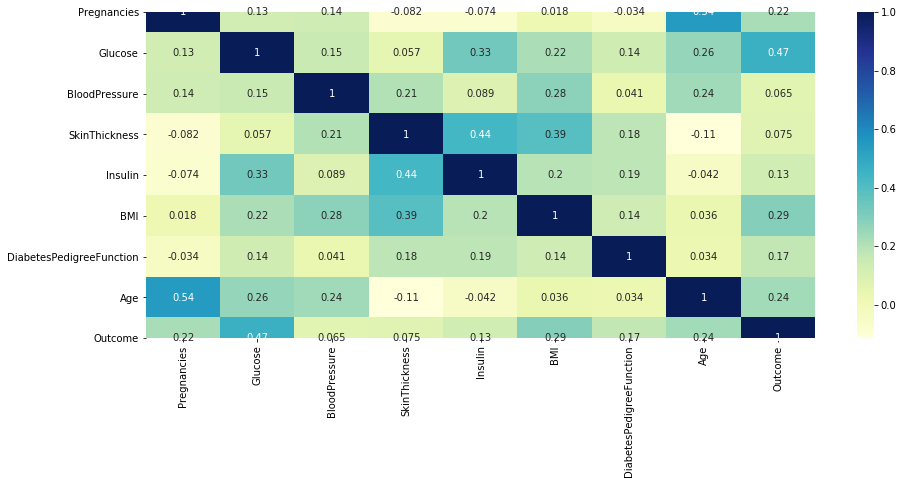

In [6]:
corrmat = diabetes.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,6))
sns.heatmap(diabetes.corr(),cmap = 'YlGnBu', annot=True)

#### Feature selection:
###### Glucose:                                  0.47
###### BMI:                                          0.29
###### Age:                                          0.24
###### Pregnancies:                           0.22
###### DiabetesPeddigreeFunction: 0.17
###### Insulin:                                     0.13

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = diabetes[['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']]
Y = diabetes[['Outcome']]

In [9]:
X

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
0,148,33.6,50,6,0.627,0
1,85,26.6,31,1,0.351,0
2,183,23.3,32,8,0.672,0
3,89,28.1,21,1,0.167,94
4,137,43.1,33,0,2.288,168
...,...,...,...,...,...,...
763,101,32.9,63,10,0.171,180
764,122,36.8,27,2,0.340,0
765,121,26.2,30,5,0.245,112
766,126,30.1,47,1,0.349,0


In [10]:
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [12]:
X_test

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin
668,98,34.0,43,6,0.430,190
324,112,35.7,21,2,0.148,0
624,108,30.8,21,2,0.158,0
690,107,24.6,34,8,0.856,0
473,136,29.9,50,7,0.210,0
...,...,...,...,...,...,...
355,165,30.4,49,9,0.302,0
534,77,33.3,24,1,1.251,56
344,95,36.8,57,8,0.485,0
296,146,28.0,29,2,0.337,360


In [13]:
Y_train

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()

In [16]:
sugar = lr.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
prediction = sugar.predict(X_test)

In [18]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(Y_test, prediction)

0.7662337662337663

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(Y_test, prediction)

In [23]:
cm

array([[85, 14],
       [22, 33]], dtype=int64)

True Positive - 65, False Positive - 14
False Negative - 22, True Negative -33

###### by using the Logistic regression on diabetes dataset accuracy score is 76%.
###### As per the score %76 is not very poor score and not very good score. There are two possibilites.
###### - There is not enough sufficient data to train the model i.e., the case for low accuracy.
###### - Logistic Regression might not be tthe correct algorthim for this dataset.
###### Here iam not able to confirm yet that LG is not correct algorthim lets check on this using some Hyperparameter Optimization techniques to improve the score.
###### - Grid Seaarch Cross Validation
###### - Random Search CV

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
#c_space = np.logspace(-3, 3, 15) 
#param_grid = {'C': c_space}

#parameteres = {'C': [-3, 3, 10],  
#              'gamma': [1, 0.5, 0.1, 0.05, 0.001], 
#              'kernel': ['sigmoid']}
parameteres = {'tol': [0.001, 0.0005, 0.0001], 
               'C': [3, 3, 10]}

In [26]:
lr = LogisticRegression()

In [27]:
#lr_cv = GridSearchCV(lr, parameteres, cv = 10)
gs_cv = GridSearchCV(lr, parameteres, cv=10,
                                      refit = True, n_jobs=-1)

In [28]:
gs_cv.fit(X_test, Y_test)
#lr_cv.fit(X_test, Y_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [3, 3, 10], 'tol': [0.001, 0.0005, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
#rscv.fit(X_train, Y_train)
#print(rscv.best_estimator_)
print(gs_cv.best_estimator_)

LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.001, verbose=0,
                   warm_start=False)


In [30]:
#prediction = rscv.predict(X_test)
prediction2=gs_cv.predict(X_test)

In [31]:
accuracy_score(Y_test, prediction2)

0.8181818181818182

In [32]:
cm2 = confusion_matrix(Y_test, prediction2)

In [33]:
cm2

array([[89, 10],
       [18, 37]], dtype=int64)

###### After applying the GridsearchCV to this model the accuracy has raised as %81. It is good sign
###### Let's apply the RandomSearch CV to this model and see whats happens.

In [34]:
from sklearn import metrics

In [36]:
print('Mean absolute error:', metrics.mean_absolute_error(Y_test, prediction2))
print('Mean squared error:', metrics.mean_squared_error(Y_test, prediction2))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(Y_test, prediction2)))

Mean absolute error: 0.18181818181818182
Mean squared error: 0.18181818181818182
Root mean squared error: 0.4264014327112209
